# Problem Statement (Business / ML Project)

# Goal:
- Build a robust machine-learning system to detect fraudulent credit card transactions in near real-time (or batch), in order to minimize financial losses and reduce false positives.

# Context: 
- The dataset contains 284,807 European cardholder transactions over two days, out of which only 492 (~0.17%) are labeled as fraudulent. The data is heavily imbalanced, and most features (V1–V28) are anonymized via PCA.

# Challenges:

- Class imbalance — fraud is extremely rare, so naive models may simply predict “not fraud” to get high accuracy. 

- Feature anonymity — features V1–V28 are principal components (PCA) to protect sensitive information. 

- Cost-sensitive decisions — misclassifying a fraudulent transaction (false negative) can be very costly, but too many false positives can hurt customer satisfaction and operations. 

- Temporal aspect — the “Time” feature (seconds since first transaction) could provide insights on transaction patterns.

## Objectives:

- Preprocess and analyze the raw data to understand distribution and patterns.

- Engineer features that improve the separation between fraudulent and legitimate transactions (e.g., time-based aggregations, transaction velocity).

- Train and evaluate machine learning models (e.g., classification + anomaly detection) using appropriate metrics (precision, recall, F1-score, PR-AUC) rather than just accuracy.


- Handle the class imbalance using techniques like oversampling (SMOTE), undersampling, or cost-sensitive learning. 

- Optionally, develop a simple deployment pipeline to simulate how the model could be integrated into a real-world fraud detection system.

- Provide interpretability or insights into why the model flags certain transactions as fraudulent, to assist business stakeholders.

## Abstract :

- This project mainly focuses on handling imbalanced datasets and detecting credit-card frauds using Following Machine Learning Algorithms:

- a) Logistic Regression

- b) RandomForestClassifier

- c) DecisionTreeClassifier

- d) XGBCLassifier

- e) KNeighbors Classifier

- f) GaussianNB

- These models are fitted to different datasets acquired after StandardScaler, Oversampling, Undersampling, and SMOTE techniques. Thus, separate files are created for each Machine Learning Model so that every dataset acquired after above mentioned techniques is fitted separately to our model using single function.

# ABOUT DATASETS:

- This datasets have 492 frauds out of 284,807 transactions. It is highly unbalanced; the positive class--1 (frauds) accounts for 0.172% of all transactions.

- It contains only numerical input variables, which are the result of a PCA transformation. Due to confidentiality issues, the original features are not provided and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

- Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. But, we did not consider Time for training purpose as it is of no use to build the models and may not impact our target variable.

- The feature Amount is the transaction Amount; this feature can be used, for example, for cost-sensitive learning.

- Feature Class is the response variable, and it takes the value 1 in case of fraud and 0 otherwise.

# STEPS :

- Importing Libraries & Loading Datasets.

- Data Preprocessing & Preparing Datasets.

- Exploratory Data Analysis(EDA) & Visualization.

- Handling Imbalanced Datasets.

- Conclusions.

- Further Enhancements.

- Acknowledgement and References.

# STEP-1: Importing Libraries & Loading Datasets.

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as style # for text customization

### Loading Datasets

In [3]:
main_df = pd.read_csv("creditcard.csv", )
main_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### STEP-2: Data Preprocessing & Preparing Datasets.

- Checking for any missing values...

In [4]:
main_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
main_df.isnull().values.any()

False

In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Observing Statistical Distribution of Datasets...

main_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Dropping Time Attribute
- It is of no use to build the models and may not impact our target variable.

In [8]:
main_df.drop('Time', axis=1, inplace=True)

- Now, X and y are our normal datasets..

In [9]:
X = main_df.drop('Class', axis=1)
y = main_df['Class']
X.shape, y.shape

((284807, 29), (284807,))


## Normalizing Amount attribute values using StandardScaler

- I've tried with MinMaxScaler and got similar results. You can also try and experiment with various scaling techniques.

In [10]:
temp_df = main_df.copy()

In [11]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
amount = temp_df['Amount'].values
temp_df['Amount'] = standard.fit_transform(amount.reshape(-1,1))
X_scaled = temp_df.drop('Class', axis=1)
y_scaled = temp_df['Class']
X_scaled.shape, y_scaled.shape

((284807, 29), (284807,))

In [12]:

main_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# STEP-3: Exploratoty Data Analysis(EDA) & Visualization.

- Making data ready for Plotting of Count values of Different Classes...

In [13]:
class_count_df = pd.DataFrame(main_df['Class'].value_counts().rename_axis('Class').reset_index(name='Counts'))
class_count_df['Class'].replace({0:'Normal',
                                 1:'Fraud'}, inplace=True)
class_count_df.head()

,Class,Counts
0,Normal,284315
1,Fraud,492


In [ ]:
# fig = plt.figure()
# fig.set_figheight(8)
# fig.set_figwidth(10)
# plt.bar(class_count_df['Class'], class_count_df['Counts'],color=['green','red']);

## BAR_GRAPH

C:\Users\mrpra\AppData\Local\Temp\ipykernel_37628\1475047372.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
C:\Users\mrpra\AppData\Local\Temp\ipykernel_37628\1475047372.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')


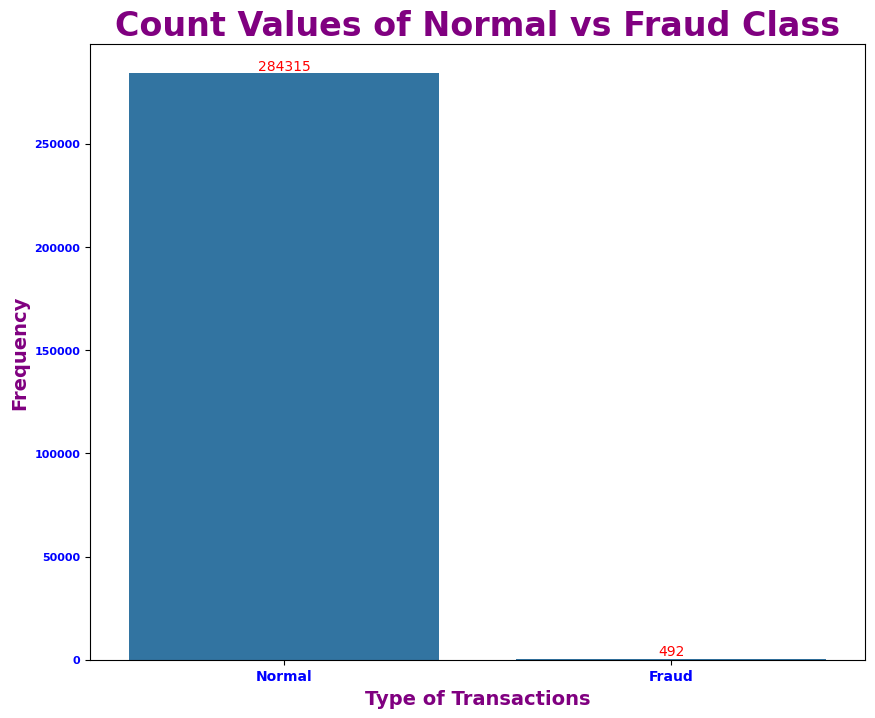

In [14]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

ax = sns.barplot(x=class_count_df['Class'],
                 y=class_count_df['Counts'])

ax.bar_label(ax.containers[0], color='red') ## Showing Values at top of Each Bar.

ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
labels, location = plt.yticks()
ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')

plt.xlabel(xlabel='Type of Transactions', fontsize=14, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Frequency', fontsize=14, fontweight='bold').set_color('purple')
plt.title(label='Count Values of Normal vs Fraud Class', fontsize=24, fontweight='bold').set_color('purple')

## Analyzing before plotting graph of Variation of Amount per Class

In [15]:
fraud = main_df[main_df['Class'] == 1]
normal = main_df[main_df['Class'] == 0]
fraud.shape, normal.shape

((492, 30), (284315, 30))

In [16]:
fraud_frc = len(fraud)/float(len(main_df))
fraud_frc

0.001727485630620034

In [17]:
print(f"Percentage of Fraud Tnx in datasets : {fraud_frc*100:.2f}%")

Percentage of Fraud Tnx in datasets : 0.17%


In [18]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## HISTOGRAM

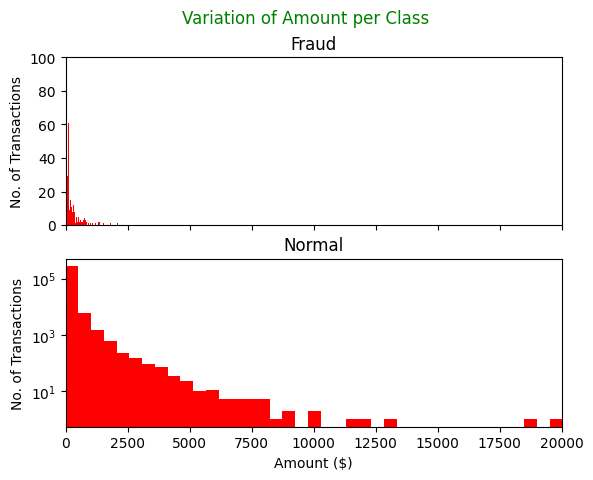

In [20]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True)
fig.suptitle("Variation of Amount per Class", color='green')
bins=50
ax0.hist(fraud['Amount'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(normal['Amount'], bins=bins, color='red')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

# STEP-4: Handling Imbalanced Datasets.

### Techniques to Handle Imbalanced Data For a Classification Problem

### 1) Choose Proper Evaluation Metrics

- Choose Proper Evaluation Metrics
Accuracy may be good enough for a well-balanced class, but not ideal for the imbalanced class problem. The other metrics, like precision(a measure of how accurate the classifier’s prediction of a specific class ) and recall (a measure of the classifier’s ability to identify a class ), are also considered.

- For an imbalanced class dataset, the F1 score is a more appropriate metric. The F1 score is defined as the harmonic mean between precision and recall. It is used as a statistical measure to rate performance. F1-score ranges between 0 and 1. The closer it is to 1, the better the model.

### 2) Resampling(Undersampling and Oversampling)

### OverSampling

In [21]:
main_df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [22]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = main_df[(main_df['Class']==0)] 
df_minority = main_df[(main_df['Class']==1)]

# upsample minority class
df_minority_oversampled = resample(df_minority,
                                 replace=True,
                                 n_samples=284315,
                                 random_state=42)
# Combine majority class with upsampled minority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
df_oversampled.Class.value_counts()

Class
1    284315
0    284315
Name: count, dtype: int64

In [23]:
# Final Sampled Dataset:
X_oversampled = df_oversampled.drop('Class', axis=1)
y_oversampled = df_oversampled['Class']
X_oversampled.shape, y_oversampled.shape

((568630, 29), (568630,))

## Undersampling

In [24]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)

X_undersampled, y_undersampled = rus.fit_resample(X, y)
print(f"The number of Classes before the fit {Counter(y)}")
print(f"The number of Classes after the fit {Counter(y_undersampled)}")

The number of Classes before the fit Counter({0: 284315, 1: 492})
The number of Classes after the fit Counter({0: 492, 1: 492})


## 3) SMOTE(Synthetic Minority Oversampling Technique)

Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [25]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class. The strategy can be changed as required.

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.

X_smote, y_smote = sm.fit_resample(main_df.drop('Class', axis=1), main_df['Class'])
smote_df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
X_smote.shape

(568630, 29)

In [26]:
X_smote.shape

(568630, 29)

In [27]:
smote_df.Class.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

 ###  Conclusions:

a) Out of all 6 Machine Learning Models used, Random Forest Classifier works efficiently with a Maximum Accuracy of 99.996483% and a macro-average of F1-Score of 1.00 achieved with the Oversampling technique.

b) Oversampling Techniques proved to be efficient for handling Imbalanced Datasets.

c) RandomForest, XGBoost, DecisionTree, and K-Neighbors work efficiently even for these Imbalanced Datasets.

d) RandomForest takes lots of Training Time among all of Six models used.